In [33]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


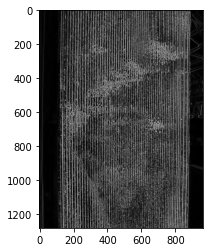

In [54]:
import sys
import cv2 as cv
import matplotlib.pyplot as plt


scale = 1
delta = 0
ddepth = cv.CV_16S

src = cv.imread('/content/drive/My Drive/Image.jpg')
    
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
  
    
grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)

grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=1, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
    
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
plt.imshow(grad, cmap='gray')


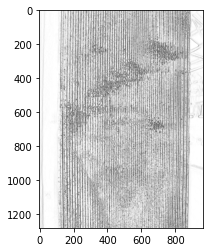

In [55]:
vertical = cv.bitwise_not(grad)
plt.imshow(vertical,cmap='gray')

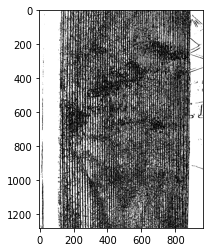

In [56]:
ret, thresh1 = cv.threshold(vertical, 230, 255, cv.THRESH_BINARY) 
plt.imshow(thresh1,cmap='gray')

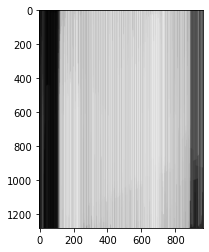

In [64]:
import numpy as np
image=np.copy(grad)
rows = image.shape[0]
verticalsize = rows // 1
    # Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations

morphed = cv.dilate(grad, verticalStructure)
plt.imshow(morphed,cmap='gray')

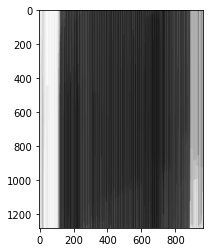

In [68]:
final = cv.bitwise_not(morphed)
plt.imshow(final,cmap='gray')

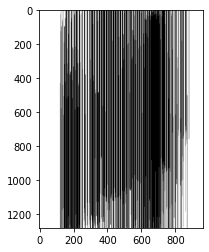

In [78]:
ret1, final1 = cv.threshold(final, 95, 255, cv.THRESH_BINARY) 
plt.imshow(final1,cmap='gray')